In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

In [5]:
load_dataset('lukebarousse/data_jobs')

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [6]:
dataset = load_dataset('lukebarousse/data_jobs')

In [8]:
dataset['train'].to_pandas()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = dataset['train'].to_pandas()

In [14]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

#**Plotting count of job posting over time**

In [20]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [25]:
monthly_counts = df.job_posted_month.value_counts().sort_index()

monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


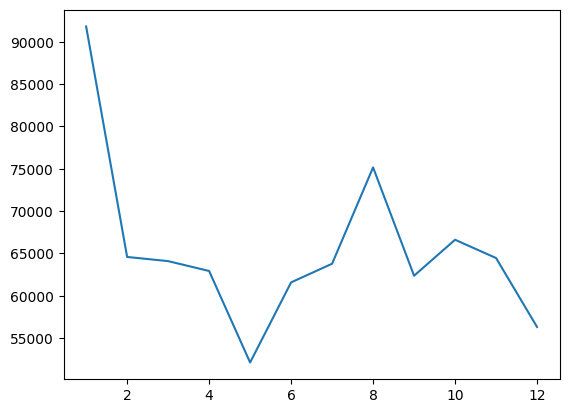

In [27]:
plt.plot(monthly_counts)
plt.show()

#**Ploting Count of Job Titles Posted**

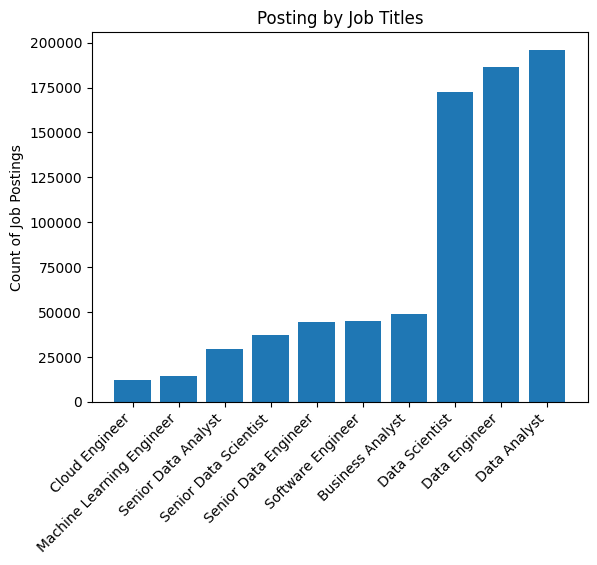

In [40]:
df.job_title_short.value_counts().sort_values(ascending=False)

job_counts = df.job_title_short.value_counts().sort_values(ascending=True)

plt.bar(job_counts.index, job_counts)
plt.title('Posting by Job Titles')
plt.ylabel('Count of Job Postings')
plt.xticks(rotation=45, ha='right')
plt.show()

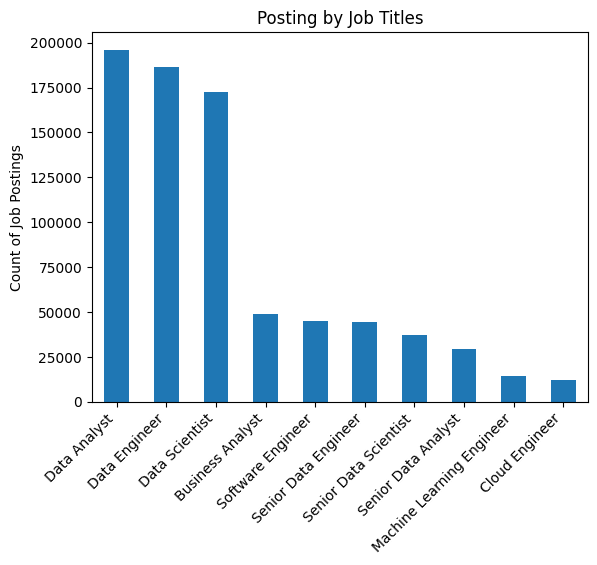

In [42]:
job_counts = df.job_title_short.value_counts().sort_values(ascending=False)
job_counts.plot(kind='bar')
plt.title('Posting by Job Titles')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

#**Median Job Salary Grouped by Job Title**

In [56]:
median_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)
median_salary

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Software Engineer,99150.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Data Engineer,125000.0
Data Scientist,127500.0
Senior Data Engineer,147500.0


#**Mean Job Salary Grouped by Job Title**

In [55]:
mean_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)
mean_salary

,salary_year_avg
job_title_short,
Business Analyst,91082.612833
Data Analyst,93841.907854
Cloud Engineer,111268.453846
Software Engineer,113393.760054
Senior Data Analyst,113911.363665
Machine Learning Engineer,126774.315972
Data Engineer,130125.604250
Data Scientist,135988.837171
Senior Data Engineer,145840.611624


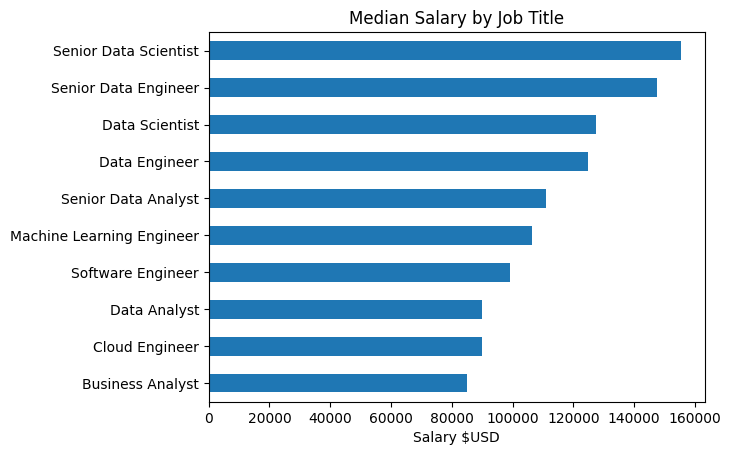

In [57]:
median_salary.plot(kind='barh')
plt.title('Median Salary by Job Title')
plt.ylabel('')
plt.xlabel('Salary $USD')
plt.show()

In [ ]:
"""from matplotlib import pyplot as plt
_df_1['salary_year_avg'].plot(kind='hist', bins=20, title='salary_year_avg')
plt.gca().spines[['top', 'right',]].set_visible(False)"""